Fitting the Line using the data points with the help of Least Squre Method

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

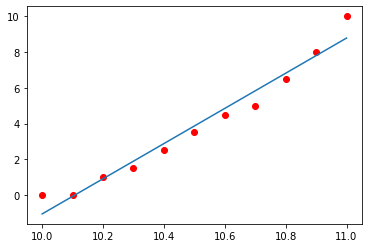

In [2]:
i = [1,2,3,4,5,6,7,8,9,10,11]
x = [10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0]
y = [0,0,1.0,1.5,2.5,3.5,4.5,5.0,6.5,8.0,10.0]

dic = {'I':i,'X':x,'Y':y}
data = pd.DataFrame(dic)

xy = data['X']*data['Y']
data = data.assign(XY = xy)

xsqr = data['X']*data['X']
data = data.assign(Xsqr = xsqr)

w = int(len(data)*sum(data['XY']) - sum(data['Y'])*sum(data['X'])  )
f = int((len(data)*sum(data['Xsqr']) - (sum(data['X']))**2))
a = w/f

b = (sum(data['Y']) - a*sum(data['X']))/len(data)

h = []
for i in range (len(data)):
    k = a*data['X'][i] + b
    h.append(k)
    
plt.plot(x,h)
plt.scatter(x,y,color = 'Red')

plt.show()

In [3]:
def matrix_norm(matrix):
    norm = 0.0
    for row in matrix:
        for element in row:
            norm += element**2

    return norm**0.5


x = [10.0,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,11.0]
arr = np.vstack((x,np.ones(len(x)))).T
arr

inverse_arr = np.linalg.pinv(arr)
arr_1 = np.dot(arr.T,arr)
arr_1

normA = matrix_norm(arr_1)
normA1 = matrix_norm(np.linalg.inv(arr_1))

condition_number = normA*normA1
condition_number


123986.22500000855

2


In [4]:
def gauss_elimination(a_matrix, b_matrix):
    if a_matrix.shape[0] != a_matrix.shape[1]:
        print('Error: Square matrix not given!')
        return None
    
    if b_matrix.ndim != 1 or b_matrix.shape[0] != a_matrix.shape[0]:
        print('Error: Constant vector incorrectly sized')
        return None
    
    n = len(b_matrix)
    m = n-1
    i = 0
    x = np.zeros(n)
    
    augmented_matrix = np.concatenate((a_matrix, b_matrix.reshape(-1, 1)), axis=1).astype(float)

    while i < n:
        if augmented_matrix[i][i] == 0.0:
            print('Divide by Zero error')
            return None
        
        for j in range(i+1, n):
            scaling_factor = augmented_matrix[j][i] / augmented_matrix[i][i]
            augmented_matrix[j] = augmented_matrix[j] - (scaling_factor * augmented_matrix[i])
         
        i = i + 1
        
    x[m] = augmented_matrix[m][n] / augmented_matrix[m][m]
    
    for k in range(n-2, -1, -1):
        x[k] = augmented_matrix[k][n]
        
        for j in range(k+1, n):
            x[k] = x[k] - (augmented_matrix[k][j] * x[j])
        
        x[k] = x[k] / augmented_matrix[k][k]
    
    return x

def norm_difference(x_exact, x_approx):
    return np.linalg.norm(x_exact - x_approx)

def round_off_matrix(matrix, decimals=3):
    return np.round(matrix, decimals)

# Given matrix A
A = np.array([
    [1/1, 1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10],
    [1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11],
    [1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12],
    [1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13],
    [1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14],
    [1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14, 1/15],
    [1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14, 1/15, 1/16],
    [1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14, 1/15, 1/16, 1/17],
    [1/9, 1/10, 1/11, 1/12, 1/13, 1/14, 1/15, 1/16, 1/17, 1/18],
    [1/10, 1/11, 1/12, 1/13, 1/14, 1/15, 1/16, 1/17, 1/18, 1/19]
])

# Exact solution
B = np.sum(A, axis=1)
x_exact = gauss_elimination(A,B)

x_approx = gauss_elimination(round_off_matrix(A), round_off_matrix(B))

# Norm of the difference
#norm_diff = norm_difference(X, X)
norm_diff = norm_difference(x_exact, x_approx)
# Norm of the inverse matrix
norm_inverse = np.linalg.norm(np.linalg.inv(round_off_matrix(A)))

print(f"Exact Solution: {x_exact}")
print(f"Exact Solution: {x_approx}")
print(f"||X - X^||: {norm_diff}")
print(f"||A^(-1)||: {norm_inverse}")


Exact Solution: [1.         1.00000013 0.99999725 1.00002475 0.99988305 1.00031898
 0.99948016 1.00049946 0.99973912 1.00005711]
Exact Solution: [ 0.95321246  1.17773606  1.85479919 -1.15819006  2.01947008 -0.5306545
  0.92113273  4.61445658  1.41789232 -1.22370918]
||X - X^||: 5.19544100636393
||A^(-1)||: 20222.456462504917


3

In [5]:
A1 = np.array([
    [1/1, 1/2, 1/3, 1/4, 1/5],
    [1/2, 1/3, 1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5, 1/6, 1/7],
    [1/4, 1/5, 1/6, 1/7, 1/8],
    [1/5, 1/6, 1/7, 1/8, 1/9]
])

print(A1)

# Right-hand side vector b
B1 = np.sum(A1, axis=1)

print(B1)

B2 = B1 + 0.05

[[1.         0.5        0.33333333 0.25       0.2       ]
 [0.5        0.33333333 0.25       0.2        0.16666667]
 [0.33333333 0.25       0.2        0.16666667 0.14285714]
 [0.25       0.2        0.16666667 0.14285714 0.125     ]
 [0.2        0.16666667 0.14285714 0.125      0.11111111]]
[2.28333333 1.45       1.09285714 0.88452381 0.74563492]


In [6]:
first = gauss_elimination(A1,B1)
print(first)

[1. 1. 1. 1. 1.]


In [7]:
second = gauss_elimination(A1,B2)
print(second)

[  1.25  -5.    32.5  -55.    32.5 ]


In [8]:
difference = second - first
difference

array([  0.25,  -6.  ,  31.5 , -56.  ,  31.5 ])

In [9]:
A2_norm = (np.sum(A1**2))**0.5
A2_invnorm = (np.sum(np.linalg.inv(A1)**2))**0.5
condition_number2 = A2_norm*A2_invnorm
print("Condition Number", condition_number2)

Condition Number 480849.11699433636
